In [289]:
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import math
#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [290]:
A = pd.DataFrame({'월' : [21,27] , '화' : [22,28] , '수' : [22,29] , '목' : [23,30] , '금' : [23,31] , '토' : [24,32] , '일' : [24,31]})
A.index = ['최저' , '최고']
A

,월,화,수,목,금,토,일
최저,21,22,22,23,23,24,24
최고,27,28,29,30,31,32,31


In [291]:
#최저의 평균과 분산

A = A.transpose()

A

,최저,최고
월,21,27
화,22,28
수,22,29
목,23,30
금,23,31
토,24,32
일,24,31


In [292]:
print(np.mean(A['최저']))
print(np.mean(A['최고']))

22.714285714285715
29.714285714285715


In [293]:
print(np.var(A['최저'] , ddof =1 ))
print(np.var(A['최고'] , ddof =1 ))

1.238095238095238
3.2380952380952377


In [294]:
A.describe()

,최저,최고
count,7.000000,7.000000
mean,22.714286,29.714286
std,1.112697,1.799471
min,21.000000,27.000000
25%,22.000000,28.500000
50%,23.000000,30.000000
75%,23.500000,31.000000
max,24.000000,32.000000


In [295]:
A['x_i - |x'] = A['최저'] - np.mean(A['최저'])
A['y_i - |y'] = A['최고'] - np.mean(A['최고'])
A['(x_i - |x) * (y_i - |y)'] = A['x_i - |x'] * A['y_i - |y']
A

,최저,최고,x_i - |x,y_i - |y,(x_i - |x) * (y_i - |y)
월,21,27,-1.714286,-2.714286,4.653061
화,22,28,-0.714286,-1.714286,1.224490
수,22,29,-0.714286,-0.714286,0.510204
목,23,30,0.285714,0.285714,0.081633
금,23,31,0.285714,1.285714,0.367347
토,24,32,1.285714,2.285714,2.938776
일,24,31,1.285714,1.285714,1.653061


In [296]:
a = pd.DataFrame(A[:].sum(axis=0))
a = a.transpose()
a[a.columns[0:-1]] = '-'
a.index = ['합계']
a

,최저,최고,x_i - |x,y_i - |y,(x_i - |x) * (y_i - |y)
합계,-,-,-,-,11.428571


In [297]:
A = pd.concat([A, a])
A

,최저,최고,x_i - |x,y_i - |y,(x_i - |x) * (y_i - |y)
월,21,27,-1.714286,-2.714286,4.653061
화,22,28,-0.714286,-1.714286,1.224490
수,22,29,-0.714286,-0.714286,0.510204
목,23,30,0.285714,0.285714,0.081633
금,23,31,0.285714,1.285714,0.367347
토,24,32,1.285714,2.285714,2.938776
일,24,31,1.285714,1.285714,1.653061
합계,-,-,-,-,11.428571


In [298]:
#공분산
print(11.428571 / 6)

1.9047618333333334


In [299]:
D = pd.DataFrame({'x_i' : [6,8,11,12,15] , 'y_i' : [5,7,9,9,13]})
D

,x_i,y_i
0,6,5
1,8,7
2,11,9
3,12,9
4,15,13


In [300]:
D['x_i - |x'] = D['x_i'] - np.mean(D['x_i'])
D['y_i - |y'] = D['y_i'] - np.mean(D['y_i'])
D['x_i - |x * y_i - |y'] = D['x_i - |x'] * D['y_i - |y']
D

,x_i,y_i,x_i - |x,y_i - |y,x_i - |x * y_i - |y
0,6,5,-4.4,-3.6,15.84
1,8,7,-2.4,-1.6,3.84
2,11,9,0.6,0.4,0.24
3,12,9,1.6,0.4,0.64
4,15,13,4.6,4.4,20.24


In [301]:
a = pd.DataFrame(D[:].sum(axis=0))
a = a.transpose()
a.index = ['합계']
a[a.columns[2:-1]] = '-'

D = pd.concat([D,a])
D

,x_i,y_i,x_i - |x,y_i - |y,x_i - |x * y_i - |y
0,6.0,5.0,-4.4,-3.6,15.84
1,8.0,7.0,-2.4,-1.6,3.84
2,11.0,9.0,0.6,0.4,0.24
3,12.0,9.0,1.6,0.4,0.64
4,15.0,13.0,4.6,4.4,20.24
합계,52.0,43.0,-,-,40.80


In [302]:
#표본공분산
print(40.8 / (5-1))

10.2


In [303]:
print(np.cov(D.iloc[:-1,0], D.iloc[:-1,1])[0,1]) #공분산

10.2


In [304]:
A

,최저,최고,x_i - |x,y_i - |y,(x_i - |x) * (y_i - |y)
월,21,27,-1.714286,-2.714286,4.653061
화,22,28,-0.714286,-1.714286,1.224490
수,22,29,-0.714286,-0.714286,0.510204
목,23,30,0.285714,0.285714,0.081633
금,23,31,0.285714,1.285714,0.367347
토,24,32,1.285714,2.285714,2.938776
일,24,31,1.285714,1.285714,1.653061
합계,-,-,-,-,11.428571


In [305]:
A = A.iloc[:-1 , [0,1]]
A

,최저,최고
월,21,27
화,22,28
수,22,29
목,23,30
금,23,31
토,24,32
일,24,31


In [306]:
A = A.astype('int')
A

,최저,최고
월,21,27
화,22,28
수,22,29
목,23,30
금,23,31
토,24,32
일,24,31


Text(24.25, 29.5, '|y = 29.5')

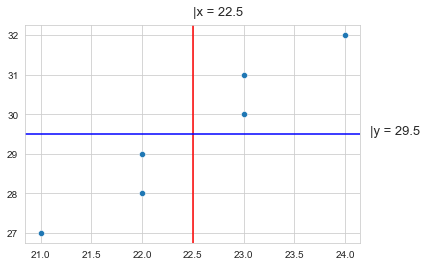

In [307]:
x = A.iloc[:-1, 0].tolist()
y = A.iloc[:-1 ,1].tolist()

ax = sns.set_style('whitegrid')
ax = sns.scatterplot(x= x , y = y)
ax.axvline(x= np.mean(x), ymin=0 , ymax=1 , color = 'red' , linestyle ='solid' , label ='{}'.format(2))
ax.axhline(y= np.mean(y), xmin=0 , xmax=1 , color = 'blue' , linestyle ='solid' , label ='{}'.format(2))
ax.text(np.mean(x) , 32.5 , f'|x = {round(np.mean(x),2)}',fontsize=13)
ax.text(24.25 , np.mean(y)  , f'|y = {round(np.mean(y),2)}',fontsize=13)

AttributeError: 'FacetGrid' object has no attribute 'set_xlim'

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44256 missing from current fon

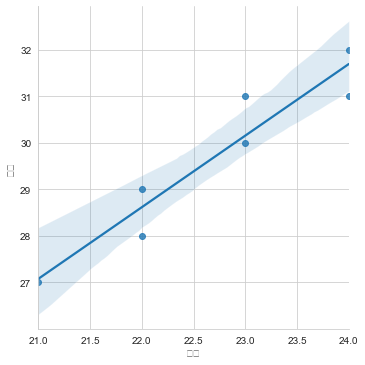

In [309]:
# fig , ax = plt.subplots(1, 1, figsize=(15,8))

ax = sns.lmplot(x='최저' , y= '최고' , data = A )
#ax.set_xlim(20.0 , 25.0)


Text(0.5, 0.98, 'Main')

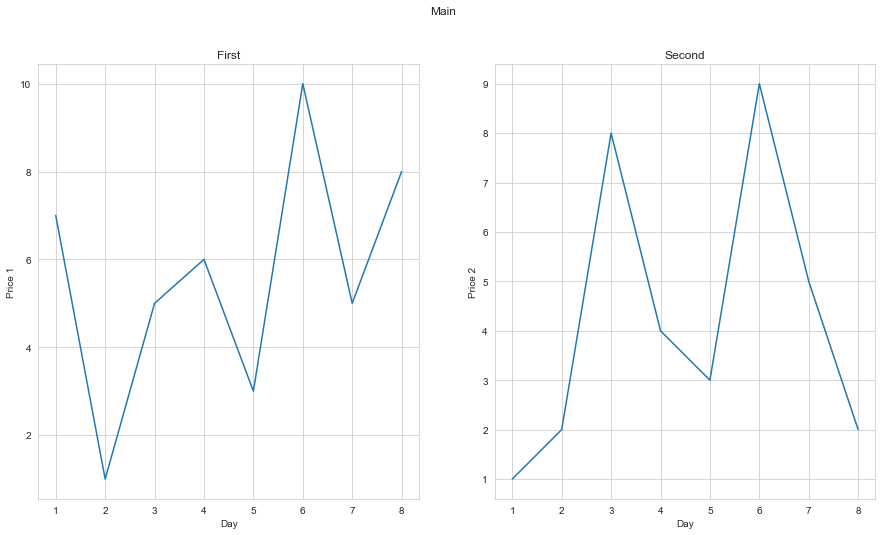

In [288]:
df = pd.DataFrame({"Price 1": [7,1,5,6,3,10,5,8],
                   "Price 2" : [1,2,8,4,3,9,5,2],
                   "Day":[1,2,3,4,5,6,7,8]})


fig, axes = plt.subplots(1, 2 ,   figsize=(15,8))

sns.lineplot(x = 'Day', y = 'Price 1',data = df, ax = axes[0])
sns.lineplot(x = 'Day', y = 'Price 2',data = df, ax = axes[1])
axes[0].set_title("First")
axes[1].set_title("Second")
plt.suptitle("Main")

In [310]:
A

,최저,최고
월,21,27
화,22,28
수,22,29
목,23,30
금,23,31
토,24,32
일,24,31


In [316]:
gong_bun = np.cov(A['최저'] , A['최고'])[0,1] #표본공분산
# gong_bun = math.sqrt(gong_bun)
gong_bun

1.9047619047619044

In [318]:
s_x = np.std(A['최저'] , ddof= 1)
s_y = np.std(A['최고'] , ddof =1)

print(s_x)
print(s_y)

corr = round(gong_bun / (s_x*s_y),4)
corr

1.1126972805283735
1.7994708216848745


0.9513